## Mengolah data PTA


setelah melakukan pelabelan pada data tahap selanjutnya yaitu melakukan preprocessing data dan memasukkan model ke dalamnya.

In [247]:
import numpy as np
import pandas as pd

In [248]:
df = pd.read_csv('https://raw.githubusercontent.com/Tegar11-F/Data-Set/main/Data_PTA.csv')
# df = df.drop(['Unnamed: 0.1'], axis=1)
df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika,RPL
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika,komputasi
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


## pengecekan data kosong dan pembersihan

In [249]:
# count nan value
df.isnull().sum()

NPM         0
Judul       6
Abstrak    25
Prodi       0
Label      43
dtype: int64

In [250]:
df.dropna(inplace=True)

In [251]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

In [252]:
df.count()

NPM        810
Judul      810
Abstrak    810
Prodi      810
Label      810
dtype: int64

In [253]:
df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika,RPL
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika,komputasi
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


In [254]:
# Jumlah data pada masing-masing label KBK
df['Label'].value_counts()

komputasi    573
RPL          198
PBA           39
Name: Label, dtype: int64

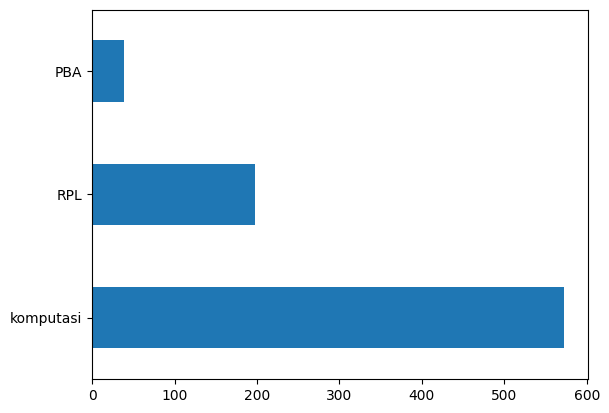

In [255]:
import matplotlib.pyplot as plt

df['Label'].value_counts().plot(kind='barh')
plt.show()

## text processing

##text cleanning

pada tahap ini dilakukan penghapusan tanda baca 

In [256]:
import re, string

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [257]:
df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))

df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL
1,40411100476,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi
4,80411100115,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


In [258]:
# Checkpoint: Export Hasil Text Cleaning
df.to_csv('pta-cleaning.csv')

## Remove Missing Values

pada tahap ini jika terdapat string yang kosong maka di ubah menjadi NaN value

In [259]:
# Ubah empty string menjadi NaN value
df = df.replace('', np.nan)

In [260]:
# Cek missing values
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

In [261]:
# Remove missing values
df.dropna(inplace=True)
len(df)

810

## Remove Duplicate Values

pada tahap ini dilakukan pengecekan apakah ada judul abstrak yang duplikat atau tidak 

In [262]:
# Cek apakah terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label
728,120411100015,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,Teknik Informatika,komputasi


In [263]:
# Remove duplicates judul
df.drop_duplicates(subset=['Judul'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label


In [264]:
# Cek apakah terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label


In [265]:
# Remove duplicates abstrak
df.drop_duplicates(subset=['Abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label


In [266]:
# Checkpoint: Export Hasil Preprocessing
df.to_csv('preprocessed-pta.csv')

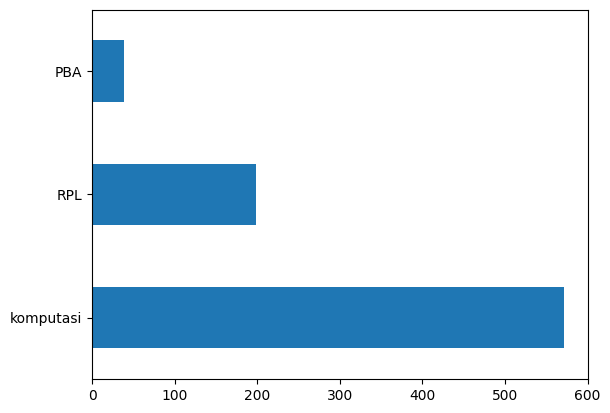

In [267]:
# Distribusi Kelas setelah Text Preprocessing
df['Label'].value_counts().plot(kind='barh')
plt.show()

## Tokenization

pada tahap ini dilakukan pemecahan kalimat menjadi per kata

In [268]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenizing Judul
df['judul_tokens'] = df['Judul'].apply(lambda x: word_tokenize(x))
df[["Judul", "judul_tokens"]].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[perancangan, dan, implementasi, sistem, datab..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, dan, monitoring, jaringan,..."
2,rancang bangun aplikasi proxy server untukenkr...,"[rancang, bangun, aplikasi, proxy, server, unt..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."


In [269]:
# Tokenizing Abstrak
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."


## Stop Words Removal

pada tahap ini dilakukan penghilangan kata hubung

In [270]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['judul_tokens'] = df['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [271]:
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[perancangan, implementasi, sistem, database, ..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaringan, komp..."
2,rancang bangun aplikasi proxy server untukenkr...,"[rancang, bangun, aplikasi, proxy, server, unt..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."


In [272]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, lan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, didunia, mu..."


## Stemming

pada tahap ini dilakukan peubahan kata kerja menjadi kata dasar

In [273]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [274]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [275]:
# Stemming judul
df['judul_tokens'] = df['judul_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/809 [00:00<?, ?it/s]

In [276]:
# Hasil stemming judul
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[ancang, implementasi, sistem, database, distr..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaring, komput..."
2,rancang bangun aplikasi proxy server untukenkr...,"[rancang, bangun, aplikasi, proxy, server, unt..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, dukung, putus, optimasi, jadwal, mata..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, g..."


In [277]:
# Stemming abstrak
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/809 [00:00<?, ?it/s]

In [278]:
# Hasil stemming Abstrak
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[jalan, koneksi, jaring, komputer, lancar, gan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[jadwal, kuliah, guru, kompleks, masalah, vari..."
4,seiring perkembangan teknologi yang ada diduni...,"[iring, kembang, teknologi, dunia, muncul, tek..."


## pengabungan semua hasil dari text processing

In [279]:
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))
df

,NPM,Judul,Abstrak,Prodi,Label,judul_tokens,abstrak_tokens
0,40411100468,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL,"[ancang, implementasi, sistem, database, distr...",sistem informasi akademik siakad sistem inform...
1,40411100476,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,"[aplikasi, kontrol, monitoring, jaring, komput...",jalan koneksi jaring komputer lancar ganggu ha...
2,40411100480,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,"[rancang, bangun, aplikasi, proxy, server, unt...",web server perangkat lunak server berfungsimen...
3,70411100070,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi,"[sistem, dukung, putus, optimasi, jadwal, mata...",jadwal kuliah guru kompleks masalah variabel t...
4,80411100115,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,"[sistem, augmented, reality, animasi, benda, g...",iring kembang teknologi dunia muncul teknologi...
...,...,...,...,...,...,...,...
848,160411100032,penerapan algoritma long short term memory unt...,investasi saham selama ini memiliki resiko ker...,Teknik Informatika,komputasi,"[terap, algoritma, long, short, term, memory, ...",investasi saham milik resiko rugi dikarenakanp...
849,160411100182,sistem pencarian teks al quran terjemahan berb...,information retrieval ir merupakan pengambilan...,Teknik Informatika,PBA,"[sistem, cari, teks, al, quran, terjemah, baha...",information retrieval ir ambil informasi simpa...
850,160411100077,klasifikasi kompleksitas visual citra sampah m...,klasifikasi citra merupakan proses pengelompok...,Teknik Informatika,komputasi,"[klasifikasi, kompleksitas, visual, citra, sam...",klasifikasi citra proses kelompok piksel citra...
851,160411100084,identifikasi biner atribut pejalan kaki menggu...,identifikasi atribut pejalan kaki merupakan sa...,Teknik Informatika,komputasi,"[identifikasi, biner, atribut, pejal, kaki, ad...",identifikasi atribut pejal kaki salah teliti k...


## Split Data

In [280]:
from sklearn.model_selection import train_test_split

X = df['abstrak_tokens']
y = df['Label']


In [281]:
X

0      sistem informasi akademik siakad sistem inform...
1      jalan koneksi jaring komputer lancar ganggu ha...
2      web server perangkat lunak server berfungsimen...
3      jadwal kuliah guru kompleks masalah variabel t...
4      iring kembang teknologi dunia muncul teknologi...
                             ...                        
848    investasi saham milik resiko rugi dikarenakanp...
849    information retrieval ir ambil informasi simpa...
850    klasifikasi citra proses kelompok piksel citra...
851    identifikasi atribut pejal kaki salah teliti k...
852    topik deteksi objek tarik perhati kembang tekn...
Name: abstrak_tokens, Length: 809, dtype: object

## Feature Extraction: TF-IDF

In [282]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(X)
# X_test_tfidf = vectorizer.transform(X_test)

X_tfidf.shape

(809, 6442)

## PCA

In [283]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X = pca.fit_transform(X_tfidf.toarray())

In [284]:
terms = vectorizer.get_feature_names_out()

sums = X_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

                       term       rank
5376                 sistem  32.339549
1173                   data  28.965659
939                   citra  28.863548
3609                 metode  28.713771
2085                  hasil  27.121133
...                     ...        ...
3887  numberabstrakberbagai   0.051212
2479        jarimenggunakan   0.051212
5160                seirver   0.040808
264                analyzer   0.040808
6364              wireshark   0.040808

[6442 rows x 2 columns]


## spilt data fitur extrasi PCA

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## MODELING

## model KNN

In [312]:
from sklearn.neighbors import KNeighborsClassifier

# Buat pengklasifikasi KNN
knn = KNeighborsClassifier(n_neighbors = 5)
# Sesuaikan pengklasifikasi dengan data
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [313]:
#periksa keakuratan model kami pada data uji

knn.score(X_test, y_test)

0.831275720164609

## Model Naive Nayes

In [292]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model_gnb = gnb.fit(X_train,y_train)

prediction_gnb = model_gnb.predict(X_test)

In [293]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction_gnb))

              precision    recall  f1-score   support

         PBA       0.41      0.88      0.56        17
         RPL       0.50      0.81      0.62        53
   komputasi       0.93      0.64      0.76       173

    accuracy                           0.70       243
   macro avg       0.61      0.78      0.64       243
weighted avg       0.80      0.70      0.71       243

